In [ ]:
#import module yang dibutuhkan
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 4.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [ ]:
#upload file
from google.colab import files
upload = files.upload()

Saving heart.csv to heart.csv


In [ ]:
#cek data
heart_df = pd.read_csv("heart.csv")

heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#cek info data
heart_df = heart_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak','slp','caa','thall','output']]
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#cek banyak data
heart_df.shape

(303, 14)

In [ ]:
#definisikan X
X = np.asarray(heart_df[['trtbps', 'chol', 'fbs', 'thalachh', 'output']])
X[0:5]

array([[145, 233,   1, 150,   1],
       [130, 250,   0, 187,   1],
       [130, 204,   0, 172,   1],
       [120, 236,   0, 178,   1],
       [120, 354,   0, 163,   1]])

In [ ]:
#definisikan y
y = heart_df['output']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [ ]:
#definisikan X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(212, 5)
(212,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(91, 5)
(91,)


In [ ]:
#pemodelan Logistik Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C = 0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
#hasil prediksi
yhat

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.27747817, 0.72252183],
       [0.36876781, 0.63123219],
       [0.32094642, 0.67905358],
       [0.54341874, 0.45658126],
       [0.56109498, 0.43890502],
       [0.34193376, 0.65806624],
       [0.77283317, 0.22716683],
       [0.27802478, 0.72197522],
       [0.40021178, 0.59978822],
       [0.56069774, 0.43930226],
       [0.40901103, 0.59098897],
       [0.49587022, 0.50412978],
       [0.32999685, 0.67000315],
       [0.59226   , 0.40774   ],
       [0.795371  , 0.204629  ],
       [0.47674764, 0.52325236],
       [0.69086142, 0.30913858],
       [0.5170046 , 0.4829954 ],
       [0.75349167, 0.24650833],
       [0.31889446, 0.68110554],
       [0.3036597 , 0.6963403 ],
       [0.30226936, 0.69773064],
       [0.53708448, 0.46291552],
       [0.71008806, 0.28991194],
       [0.6741392 , 0.3258608 ],
       [0.82640141, 0.17359859],
       [0.25977018, 0.74022982],
       [0.32205252, 0.67794748],
       [0.45409403, 0.54590597],
       [0.45853446, 0.54146554],
       [0.

In [ ]:
#Cek kemungkinan resiko sakit jantung menggunakan confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[49  6]
 [ 7 29]]


Confusion matrix, without normalization
[[49  6]
 [ 7 29]]


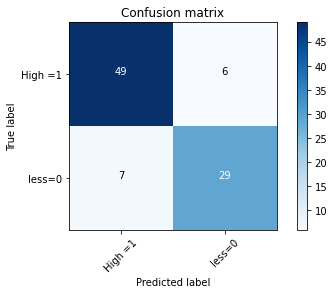

In [ ]:
cnf = confusion_matrix(y_test, yhat, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf,classes=['High =1', 'less=0'],normalize = False, title='Confusion matrix')

Algoritma/Ide :
1. Import module yang dibutuhkan
2. Upload dan cek data
3. Definisikan X dan Y
4. Definisikan Data train dan test
5. Modelkan dalam bentuk Logistik Regresi
6. Gambar Confusion Matrix untuk mengetahui kemungkinan prediksi

Catatan : Model terbaik yang digunakan adalah decision tree karena sebab-sebabnya diketahui. Saya tidak memberikan gambar decision tree karena anehnya saya tidak bisa import module Decision Tree pada nomor 3 ini.